# Data Wrangling - Armenian Online Job Postings

### Table of Contents

- <a href='#intro'>Introduction</a>
- <a href='#datawrangling'>Data Wrangling</a>
    - <a href='#gather'>Gather</a>
    - <a href='#assess'>Assess</a>
    - <a href='#clean'>Clean</a>
- <a href='#conclusion'>Conclusion</a>    

<a id='intro'></a>
# Introduction

> The online job market is a good indicator of overall demand for labor in an economy. This dataset consists of 19,000 job postings from 2004 to 2015 posted on CareerCenter, an Armenian human resource portal.

> Since postings are text documents and tend to have similar structures, text mining can be used to extract features like posting date, job title, company name, job description, salary, and more. Postings that had no structure or were not job-related were removed. The data was originally scraped from a Yahoo! mailing group.

<a id='datawrangling'></a>
## Data Wrangling

In this project, the data is downloaded programmatically, assessed and cleaned to prepare the data for further analyses and visualization.
The data can be found in [Kaggel](https://www.kaggle.com/udacity/armenian-online-job-postings). 

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import zipfile
import requests
import matplotlib.pyplot as plt

%matplotlib inline

<a id='gather'></a>
## Gather

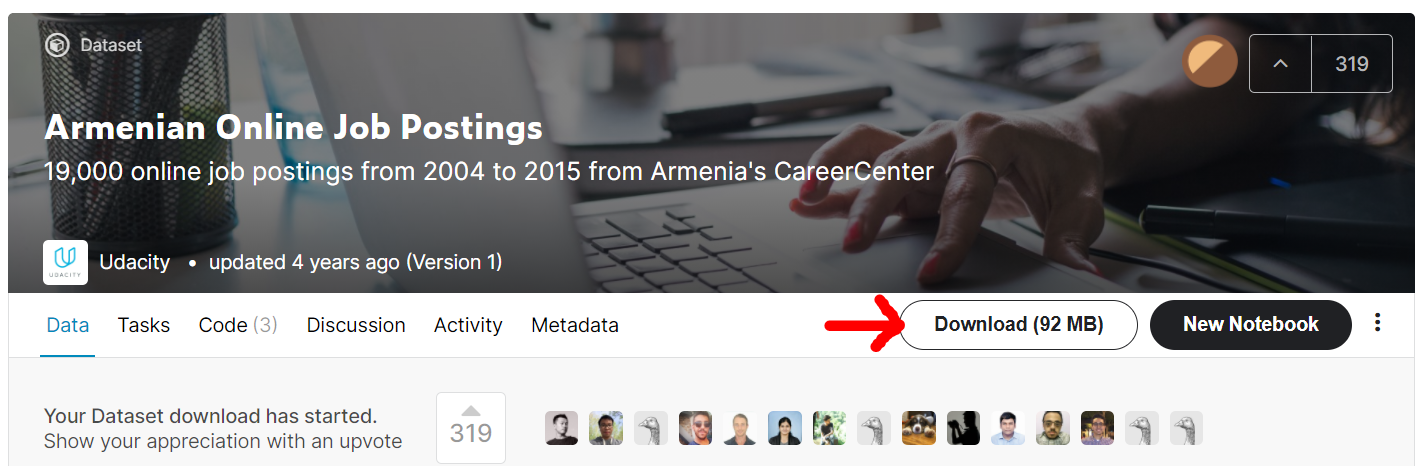


- Downloaded and pasted it in 'data' folder

In [2]:
#Extract all contents from zip file
with zipfile.ZipFile('data/archive.zip','r') as my_zip:
    my_zip.extractall('data/')

In [3]:
#read data from csv into dataframe

pd.options.display.max_rows = 4000
df = pd.read_csv('data/online-job-postings.csv')

<a id='assess'></a>
## Assess

In [4]:
# Display data
df

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


In [5]:
# Display a basic summary of the DataFrame using .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [6]:
# Display the entry counts for the StartDate column using .value_counts
# returns an object containing counts of unique values.
df['StartDate'].value_counts()

ASAP                                                                                                                                                               4754
Immediately                                                                                                                                                         773
As soon as possible                                                                                                                                                 543
Upon hiring                                                                                                                                                         261
Immediate                                                                                                                                                           259
Immediate employment                                                                                                                                            

- Missing values - NAN
- ASAP - StartDate inconsistencies
- Nondescriptive column headers (ApplicationP, AboutC, RequiredQual, JobRequirment)
- It's non-tidy data 
    - two representations for date - (date:Year,Month)
    - Two observations in one tables (company (AboutC,Company)) and jobposts

<a id='clean'></a>
## Clean

Let's consider two issues,
- <a href='#issue1'>Non-descriptive column headers</a>
- <a href='#issue2'>ASAP - StartDate inconsistencies</a>

<a id='issue1'></a>
### Issue 1

#### Define

- Select all non-descriptive and misspelled column headers(ApplicationP, AboutC, RequiredQual, JobRequirment) and replace them with full words (ApplicationProcedure, AboutCompany, RequiredQualifications, JobRequirement)

#### Code

In [7]:
# Make a copy of the dataframe
df_clean = df.copy()

In [8]:
df_clean = df_clean.rename(columns = {'ApplicationP' : 'ApplicationProcedure',
                                      'AboutC' : 'AboutCompany',
                                      'RequiredQual' : 'RequiredQualifications',
                                      'JobRequirment' : 'JobRequirement'
                                      })

#### Test

In [9]:
df_clean.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirement', 'RequiredQualifications', 'Salary',
       'ApplicationProcedure', 'OpeningDate', 'Deadline', 'Notes',
       'AboutCompany', 'Attach', 'Year', 'Month', 'IT'],
      dtype='object')

<a id='issue2'></a>
### Issue 2

#### Define

- select all records in the 'StartDate column' that have "As soon as possible", "Immediately", etc.
and replace the text in those cells with *ASAP

#### Code

In [10]:
# Get all the unique values in StartDate column to process
list_d = df_clean.StartDate.value_counts().index.tolist()
print(len(list_d))

1186


In [11]:
print(list_d)

['ASAP', 'Immediately', 'As soon as possible', 'Upon hiring', 'Immediate', 'Immediate employment', 'As soon as possible.', '01 September 2012', 'March 2006', 'November 2006', 'January 2010', '01 February 2005', 'February 2014', 'Immediate job opportunity', 'February 2011', 'September 2010', 'TBD', 'March 2011', 'September 2008', '01 July 2014', 'February 2007', '01 February 2015', '01 September 2010', 'January 2016', '01 March 2006', '01 September 2008', 'September 2013', 'Fall 2010', 'June 2008', '01 October 2008', '01 April 2014', '01 October 2012', '01 March 2012', '01 November 2007', 'March 2008', '01 September 2013', '01 April 2009', 'February 2008', '01 September 2004', '01 April 2012', '01 February 2012', 'January 2011', 'September 2007', '01 May 2007', '01 March 2008', 'January 2008', '01 June 2015', '01 September 2015', 'January 2014', 'October 2014', 'January/ February', 'March 2005', '01 October 2005', 'Immediate employment, after passing the interview.', 'October 2005', 'Ju

In [12]:
# Create a list manually that contains synonyms of ASAP
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

In [13]:
# Replace the value in dataframe as ASAP if its value in one among asap_list
for value in asap_list:
    df_clean.StartDate.replace(value,'ASAP',inplace=True)

In [14]:
df_clean.StartDate.value_counts()

ASAP                                                                                                                                                               6856
01 September 2012                                                                                                                                                    31
March 2006                                                                                                                                                           27
November 2006                                                                                                                                                        22
January 2010                                                                                                                                                         19
01 February 2005                                                                                                                                                

#### Test

In [15]:
for phrase in asap_list:
    assert phrase not in df_clean.StartDate.values

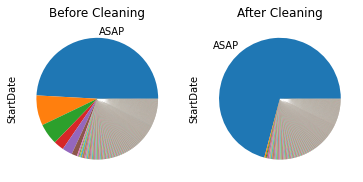

In [16]:
plt.subplot(1,2,1)

# ASAP before cleaning
labels = np.full(len(df.StartDate.value_counts()), "", dtype = object)
labels[0] = 'ASAP'
df.StartDate.value_counts().plot(kind="pie", labels = labels)
plt.title('Before Cleaning');

plt.subplot(1,2,2)

# ASAP after cleaning
labels = np.full(len(df_clean.StartDate.value_counts()), "", dtype = object)
labels[0] = 'ASAP'
df_clean.StartDate.value_counts().plot(kind="pie", labels = labels)
plt.title('After Cleaning');

<a id='conclusion'></a>
## Conclusion

- Gathered data from Kaggle
- Assessed data, found dirty & messy data and listed it
- Fixed two issues

#### Storing the partially cleaned data into csv

In [18]:
df_clean.to_csv('data/partial_cleaned.csv', index=False)